In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Normalization, Dropout
from tensorflow.keras import Input
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
link = "images/"
folder = os.listdir(link)
def data_dic():
    data_dic = {"img_path" : [], "emotion" : []}
    for f in folder:
        files = os.listdir(link + f)
        for file in files:
            data_dic["img_path"].append(link + f + "/" + file)
            data_dic["emotion"].append(file[:-4])
            # print(file[:-4])
    return data_dic
data_dic = data_dic()
print(len(data_dic["img_path"]))
e_l = {'Sad' : 0, 'Neutral' : 1, 'Happy' : 2, 'Contempt' : 3, 'Anger' : 4, 'Surprised' : 5, 'Fear' : 6, 'Disgust' : 7}

152


Lấy đường dẫn của các ảnh trong folder cho trước

In [4]:
#hàm crop đọc ảnh và xoay, cắt xén ngẫu nhiên đưa về ảnh vuông 256x256
def crop1(img):
    z = 1 - 0.01 * 10**(np.random.rand(1))
    img_ = cv2.resize(img,(int( len(img[0]) * z), int( len(img) * z)))
    r = int(150 * (np.random.rand(1) - 0.5))
    h = len(img_)
    w = len(img_[0])
    #crop
    if(h > w):
        img_ = img_[int((h - w)/ 2) + r : -int((h - w)/ 2) + r]
    elif(h < w):
        img_ = img_[:, int((w - h) / 2) + r : -int((w - h) / 2) + r]
    #rotate
    h = len(img_)
    w = len(img_[0])
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, int(60 * np.random.rand(1) - 30), 1.0)
    img_ = cv2.warpAffine(img_, M, (w, h))
    #resize
    img_ = cv2.resize(img_,(256,256))
    return img_


In [5]:
images = []
label = []
# số ảnh nhân bản của mỗi ảnh gốc
cloned = 20

for i in range(len(data_dic["img_path"])):
    img = cv2.imread(data_dic["img_path"][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for j in range(cloned):
      img_ = crop1(img)
      images.append(img_)

#read image, crop, slice, rotate

for e in data_dic["emotion"]:
  for j in range(cloned):
    label.append(e_l[e])
#convert label to id


đọc tất cả các ảnh, thêm cắt, xoay, chỉnh sửa
tạo nhãn cho các ảnh sau khi thêm cắt, xoay

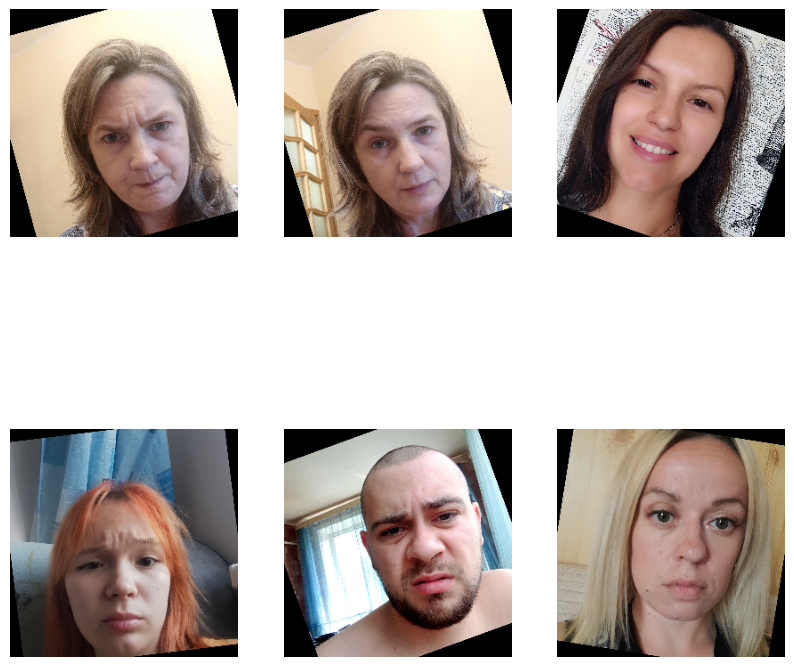

In [4]:

example_list = [image for image in random.sample(images, k=6)]

# Plot the images in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(10, 10))

for ax, img_array in zip(axes.ravel(), example_list):
    ax.imshow(img_array)
    ax.axis('off')

plt.show()

show vài ảnh ra

In [10]:
model = Sequential([
    Input(shape = images[0].shape),
    Normalization(),
    Conv2D(filters = 64, kernel_size = 5 ,strides = 1, padding = 'SAME'),
    MaxPooling2D(),
    Conv2D(filters = 64, kernel_size = 5 ,strides = 1, padding = 'SAME'),
    MaxPooling2D(),
    Normalization(),
    Conv2D(filters = 128, kernel_size = 3 ,strides = 1, padding = 'SAME'),
    MaxPooling2D(),
    Conv2D(filters = 128, kernel_size = 3 ,strides = 1, padding = 'SAME'),
    MaxPooling2D(4,4),
    Normalization(),
    Conv2D(filters = 256, kernel_size = 3 ,strides = 1, padding = 'SAME'),
    MaxPooling2D(),
    Conv2D(filters = 512, kernel_size = 3 ,strides = 1, padding = 'SAME'),
    MaxPooling2D(),
    Normalization(),
    Conv2D(filters = 512, kernel_size = 3 ,strides = 1, padding = 'SAME'),
    MaxPooling2D(),
    Flatten(),
    Dense(256),
    Dropout(0.1),
    Dense(256),
    Normalization(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(8, activation = 'softmax')

])
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

model

In [6]:
data = np.array(images)
target = np.array(tf.one_hot(label, 8))
#prepare data

In [7]:
x_train,x_test, y_train, y_test=train_test_split(data, target, test_size = 0.2, random_state = 42)


split data into tran, test set

In [11]:
model.fit(x_train, y_train, epochs = 30, validation_data=(x_test, y_test))
model.save("myModel.h5")

# # nếu đã có model thì load
# from tensorflow import keras
# model = keras.models.load_model("myModel.h5")

Epoch 1/30
76/76 [==============================] - 18s 117ms/step - loss: 39.1556 - accuracy: 0.1299 - val_loss: 2.1800 - val_accuracy: 0.1414
Epoch 2/30
76/76 [==============================] - 9s 112ms/step - loss: 2.3799 - accuracy: 0.1398 - val_loss: 2.3626 - val_accuracy: 0.1365
Epoch 3/30
76/76 [==============================] - 9s 119ms/step - loss: 2.1328 - accuracy: 0.1595 - val_loss: 2.0742 - val_accuracy: 0.1809
Epoch 4/30
76/76 [==============================] - 9s 120ms/step - loss: 2.0760 - accuracy: 0.1842 - val_loss: 2.0800 - val_accuracy: 0.1513
Epoch 5/30
76/76 [==============================] - 9s 113ms/step - loss: 2.0236 - accuracy: 0.2159 - val_loss: 2.0502 - val_accuracy: 0.1974
Epoch 6/30
76/76 [==============================] - 9s 119ms/step - loss: 2.0271 - accuracy: 0.2348 - val_loss: 1.9769 - val_accuracy: 0.2072
Epoch 7/30
76/76 [==============================] - 8s 112ms/step - loss: 1.9506 - accuracy: 0.2640 - val_loss: 1.9326 - val_accuracy: 0.2730
Epoc

fit and save model

In [12]:
data.shape

(3040, 256, 256, 3)

In [13]:
#crop new image (image was converted to color(rgb))
def crop3(img):
    h = len(img)
    w = len(img[0])
    img_ = img
    #crop
    if(h > w):
        img_ = img[int((h - w)/ 2) : -int((h - w)/ 2),:]
    elif(h < w):
        img_ = img[:, int((w - h) / 2): -int((w - h) / 2),:]
    #resize
    img_ = cv2.resize(img_,(256,256))
    return img_

In [14]:
l_e = ['Sad', 'Neutral', 'Happy', 'Contempt', 'Anger', 'Surprised', 'Fear', 'Disgust']
#convert from one-hot vector to label
def conv_prob2emot(l):
  m = max(l)
  for i in range(len(l)):
    if(l[i] == m):
      return l_e[i]


In [29]:
#func show n images by images after crop
def show_img(images):
  tmp = []
  for image in images:
    tmp.append(image)
  # Plot the images
  num_pic = len(images)
  print(num_pic)
  fig, axes = plt.subplots(int(num_pic / 3) + 1, 3, figsize=(10, 10))
  # fig, axes = plt.subplots(num_pic, 1, figsize=(10, 10))

  for ax, img_array in zip(axes.ravel(), images):
      ax.imshow(img_array)
      ax.axis('off')
  plt.show()

/content/drive/My Drive/test_img/WIN_20230817_15_59_35_Pro.jpg
/content/drive/My Drive/test_img/WIN_20230817_16_49_20_Pro.jpg
/content/drive/My Drive/test_img/WIN_20230817_16_49_34_Pro.jpg
/content/drive/My Drive/test_img/WIN_20230817_16_49_49_Pro.jpg
/content/drive/My Drive/test_img/WIN_20230817_17_02_01_Pro.jpg
/content/drive/My Drive/test_img/WIN_20230817_17_02_06_Pro.jpg
/content/drive/My Drive/test_img/WIN_20230817_17_02_18_Pro.jpg
/content/drive/My Drive/test_img/WIN_20230817_17_02_19_Pro.jpg
/content/drive/My Drive/test_img/Untitled.png
/content/drive/My Drive/test_img/WIN_20230817_17_02_22_Pro.jpg
1/1 [==============================] - 0s 23ms/step
10


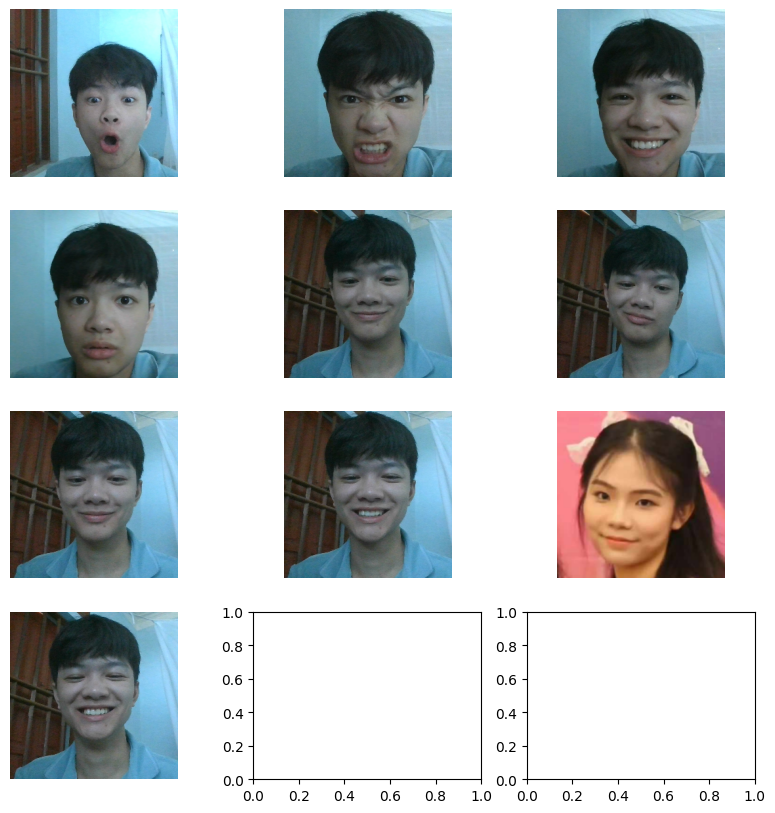

[[5.3422311e-09 3.8875737e-06 9.2913899e-11 9.7467675e-04 4.0291943e-11
  4.3638021e-10 9.1975451e-01 7.9266958e-02]
 [5.4217918e-07 4.6867848e-05 1.1961160e-03 1.4498630e-05 1.2831558e-01
  8.7042576e-01 4.1947530e-07 1.5136622e-07]
 [3.0319284e-06 8.3246699e-04 9.5903662e-05 6.6231644e-07 2.5786550e-04
  9.9536872e-01 3.4412800e-03 8.6867644e-08]
 [1.5941408e-05 9.0965256e-02 1.4306695e-05 4.0605486e-05 4.0653167e-06
  8.9852801e-03 8.9994568e-01 2.8904091e-05]
 [8.7458426e-03 4.4086079e-05 3.7336364e-01 6.0825968e-01 1.5171863e-04
  3.6737398e-04 2.2286177e-03 6.8390630e-03]
 [2.4691586e-01 2.2401353e-05 4.2828204e-04 6.2932295e-01 7.2308344e-06
  4.5085054e-07 9.3433261e-02 2.9869597e-02]
 [1.3430088e-02 9.4933683e-05 4.4829872e-01 5.3513938e-01 1.7876244e-04
  3.3391520e-04 4.4795859e-04 2.0762619e-03]
 [1.3162903e-04 4.0964210e-07 8.9262372e-01 1.0658695e-01 1.0238104e-05
  5.3245785e-06 3.0898109e-06 6.3864642e-04]
 [5.2480757e-01 1.2786373e-02 3.3917372e-06 4.5394602e-01 4.7623

In [30]:
test_folder = "test_img/"
test_image = os.listdir(test_folder)
imag = []
for im in test_image:
  img_new = cv2.imread(test_folder + im)
  print(test_folder + im)
  img_new = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)
  img_new = crop3(img_new)
  imag.append(img_new)
test = np.array(imag)
output = model.predict(test)
emotion_test = conv_prob2emot(output[0])
show_img(imag)
print(output)
for i in range(len(output)):
  print(str(i + 1) + " " + conv_prob2emot(output[i]))


#test on folder

1/1 [==============================] - 0s 21ms/step
10


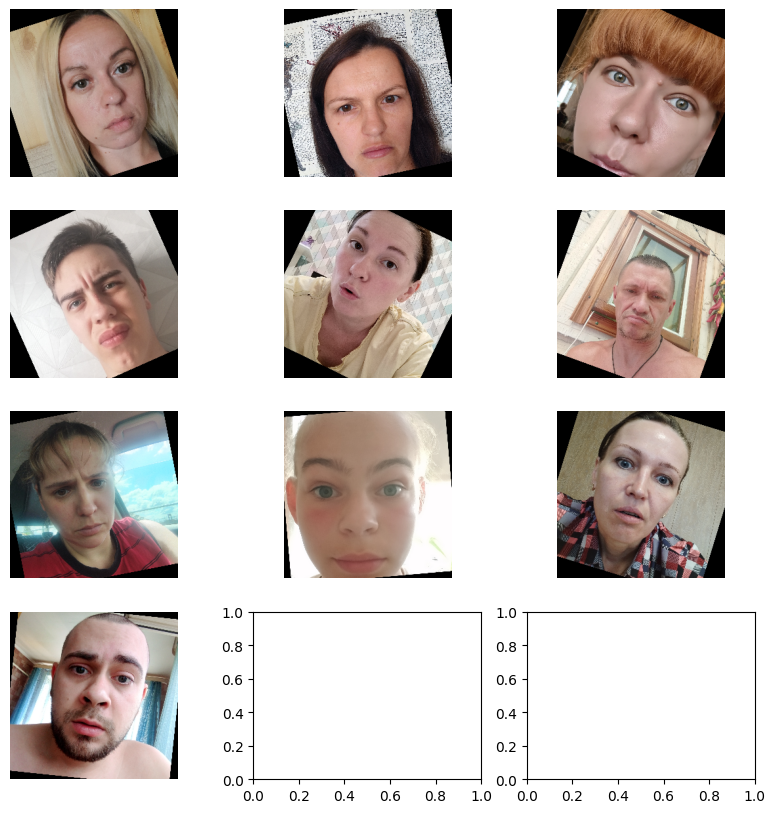

[[4.1132375e-06 9.9831855e-01 1.5755850e-09 7.1028730e-09 1.4701509e-07
  1.2714263e-04 1.5499678e-03 7.6144623e-08]
 [1.5617942e-06 1.7739476e-13 3.4466978e-17 3.0022431e-08 9.9999845e-01
  8.5444074e-12 4.4960959e-17 5.3337122e-12]
 [2.7882416e-13 1.5984288e-08 8.7599359e-09 5.0101775e-08 1.1925211e-04
  9.9987459e-01 6.0525817e-06 9.5526529e-12]
 [2.6896305e-04 1.3839161e-07 6.7553879e-06 9.9951017e-01 1.0078979e-06
  1.4735936e-06 4.7557322e-05 1.6393064e-04]
 [8.1724462e-12 4.3015667e-09 9.0563979e-08 6.9248010e-08 5.4913802e-08
  9.9999380e-01 6.0287898e-06 3.3313554e-13]
 [1.8038534e-08 9.8722458e-01 2.0111457e-09 1.4442592e-09 1.6227275e-10
  1.0337384e-04 1.2672002e-02 1.2526760e-08]
 [9.9999905e-01 2.0803034e-07 4.4195460e-08 6.7363339e-07 4.1421217e-08
  4.4186967e-11 5.2610617e-11 1.2856448e-10]
 [4.2018978e-04 4.9248672e-01 4.8037612e-01 7.0119499e-06 5.0913924e-03
  2.1594744e-02 2.3446775e-05 4.1937224e-07]
 [7.5974604e-09 4.7331570e-05 2.3775888e-03 1.5156596e-09 2.9797

In [18]:
imag_test = []
for im in x_test[0 : 10]:
  imag_test.append(im)
test = np.array(imag_test)
output = model.predict(test)
show_img(imag_test)
print(output)
for i in range(len(output)):
  print(str(i + 1) + " " + conv_prob2emot(output[i]) + " " + conv_prob2emot(y_test[i]))


test 10 head exams of test set

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix
y_predict1 = model.predict(x_test)
y_predict2 = np.argmax(y_predict1, axis = 1)
y_test2=np.argmax(y_test, axis=1)
confusion_matrix_result=confusion_matrix(y_test2,y_predict2)
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
ax = plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
ax.set_yticklabels(l_e, rotation = 0)
ax.set_xticklabels(l_e, rotation = 90)
pl.show()


NameError: name 'model' is not defined

#heat map of confusion matrix of test set